# Lab02: Gradient Descent.

- Student ID: 18127046
- Student name: Lư Ngọc Liên

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle (**recommended compression format: zip**).

**Contents:**
- Gradient descent.

**Notes that**: this lab is prepared based on the book "Deep Learning for Computer Vision with Python" by Adrian Rosebrock.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### 3.2. Create data

In [2]:
# generate a 2-class classification problem with 2,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
--> treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)


### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [3]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    
    #TODO
    return 1/(1+ np.exp(-x))

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    return x*(1-x)


#### Compute output

In [4]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    return sigmoid_activation(X @ W)
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    preds = compute_h(W,X)
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [5]:
W = np.random.randn(X.shape[1], 1)
losses = []

import copy
W_t = copy.deepcopy(W)

#### Compute gradient

In [6]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """

    gradient = trainX.T @ (2*sigmoid_deriv(h)*error)
    return gradient
    

#### Training function 

In [7]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h = compute_h(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY        
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient = compute_gradient(error, h, trainX)
        W += -learning_rate * gradient

        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [8]:
num_epochs=100
learning_rate=0.01
W = train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=661.8862374
Epoch=5, loss=2.1786823
Epoch=10, loss=2.1459861
Epoch=15, loss=2.1232998
Epoch=20, loss=2.1053773
Epoch=25, loss=2.0888948
Epoch=30, loss=2.0728738
Epoch=35, loss=2.0571264
Epoch=40, loss=2.0416225
Epoch=45, loss=2.0263571
Epoch=50, loss=2.0113289
Epoch=55, loss=1.9965368
Epoch=60, loss=1.9819800
Epoch=65, loss=1.9676573
Epoch=70, loss=1.9535676
Epoch=75, loss=1.9397095
Epoch=80, loss=1.9260816
Epoch=85, loss=1.9126825
Epoch=90, loss=1.8995104
Epoch=95, loss=1.8865635
Epoch=100, loss=1.8738401


#### Evaluate result

In [9]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       486
           1       1.00      0.99      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**TODO: Study about accuracy, recall, precision, f1-score.**

- Accuracy: How good the algorithm apply to the model
$$ accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$ 
- Recall: "The proportion of actual positives was identified correctly" [1]
$$ recall = \frac{TP}{TP+FN} $$
- Precision: "The proportion of positive identifications was actually correct" [1]
$$ precision = \frac{TP}{TP+FP}  $$
- F1: "Used to evaluate binary classification systems, which classify examples into positives or negatives"[2]
$$ Fscore = \frac{2*recall*precision}{recall+prescision} $$

[1]: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
[2]: https://deepai.org/machine-learning-glossary-and-terms/f-score


**Note**
<ul>
<li> TN / True Negative: when actual is negative and predict is negative </li>
<li> TP / True Positive: when actual is positive and predict is positive </li>
<li> FN / False Negative: when actual is positive but predict is negative </li>
<li> FP / False Positive: when actual is negative but predict is positive </li>

**Result of accuracy, recall, precision, F1 score**

In [10]:
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
accuracy = accuracy_score(testY,preds)
presision = precision_score(testY,preds)
recall = recall_score(testY,preds)
F1 = f1_score(testY,preds)
print("Accuracy : {} ".format(accuracy))
print("Presision : {} ".format(presision))
print("Recall : {}".format(recall))
print("F1 : {}".format(F1))

Accuracy : 0.997 
Presision : 1.0 
Recall : 0.9941634241245136
F1 : 0.9970731707317073


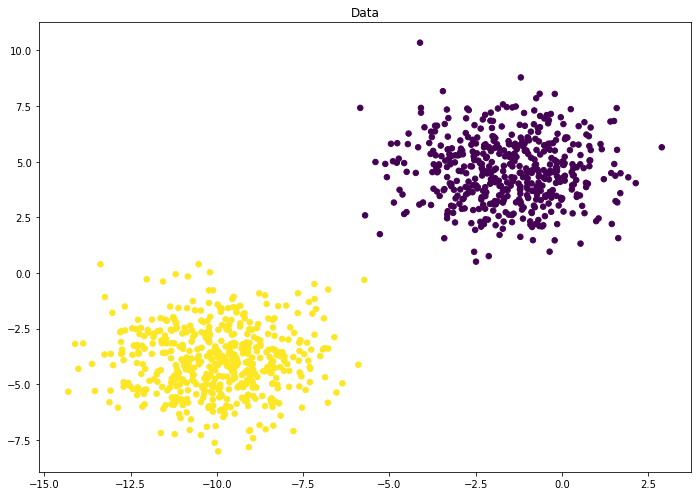

In [11]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

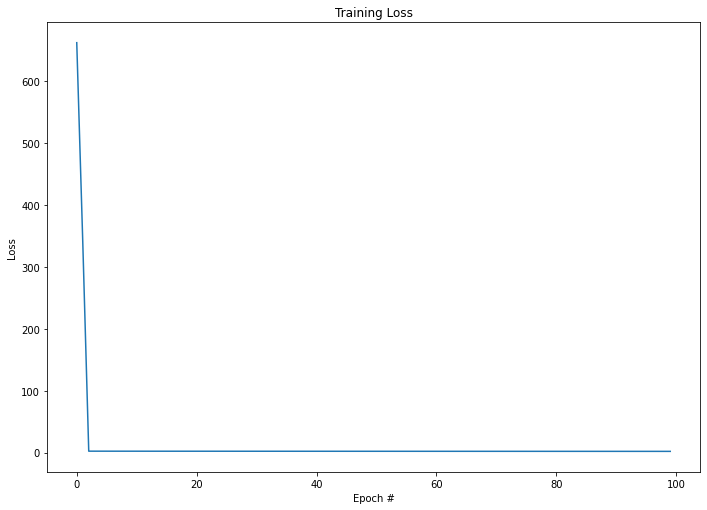

In [12]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observations**

In [13]:
l_rate = [0.03, 0.05, 0.1, 0.3, 1, 3]
W_bef = copy.copy(W_t)

In [14]:
for i in l_rate:
    W_ = copy.copy(W_bef)
    W_l = train(W_,trainX, trainY, i, num_epochs)
    preds = predict(W_l, testX)
    print(classification_report(testY, preds))


Epoch=1, loss=661.8862374
Epoch=5, loss=6.1813486
Epoch=10, loss=1.9870678
Epoch=15, loss=1.9708674
Epoch=20, loss=1.9557119
Epoch=25, loss=1.9409109
Epoch=30, loss=1.9264378
Epoch=35, loss=1.9122791
Epoch=40, loss=1.8984212
Epoch=45, loss=1.8848498
Epoch=50, loss=1.8715503
Epoch=55, loss=1.8585083
Epoch=60, loss=1.8457093
Epoch=65, loss=1.8331390
Epoch=70, loss=1.8207836
Epoch=75, loss=1.8086298
Epoch=80, loss=1.7966647
Epoch=85, loss=1.7848762
Epoch=90, loss=1.7732526
Epoch=95, loss=1.7617831
Epoch=100, loss=1.7504576
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       486
           1       1.00      0.99      1.00       514

    accuracy                           0.99      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      0.99      1.00      1000

Epoch=1, loss=661.8862374
Epoch=5, loss=9.0883717
Epoch=10, loss=4.4206716
Epoch=15, loss=1.9790159
Epoch=20, loss=1.9683163
Epoch=25, loss=1.96123

<ipython-input-3-040d4e138e08>:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


- If the learning rate is small, the gradient descent will be slow.Use many iteration to converge in global minimun.
- If the learning rate is large enough, the gradient descent will be fast to converge in global minumun.
- If the learning rate is too large, the gradient descent may fail to converge (bounding around global minimun) or even diverge (loss function may not descrease on every iteration) or get stuck in local minimun.